# Part 3 - YOLOv8 Model
### Poojitha Venkatram, Shruti Badrinarayanan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Mon Mar 25 03:06:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

In [ ]:
# !pip install albumentations

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset

/content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset


In [ ]:
ls

data.yaml  runs/  test/  train/  val/  yolov8n.pt  yolov8s.pt


## Plot random samples of Train, Validation, Test Images

### Data Preparation: The dataset has been split into train, validation and test folders with each having their images and labels folders respectively. The data transformations and augmentations are done on the fly with the details for the transformations specified in the data.yaml file.  (Step 1-3)

Train Set Samples:



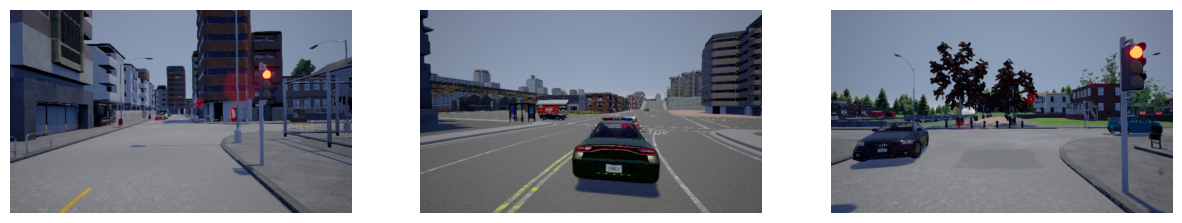


Validation Set Samples:



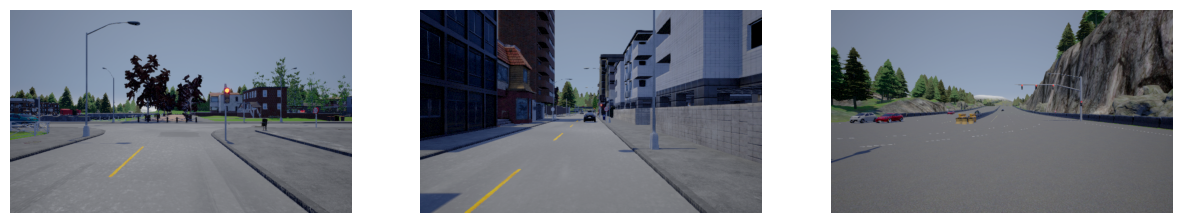


Test Set Samples:



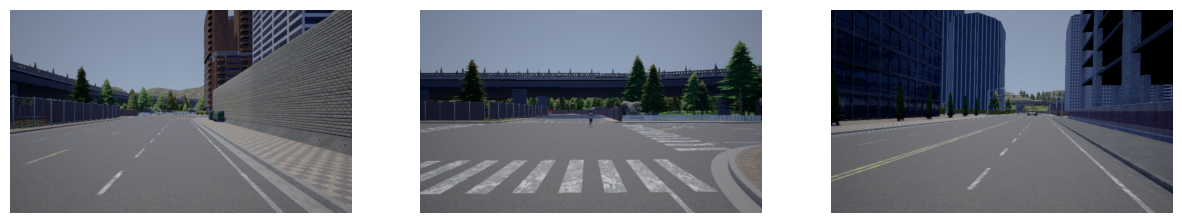

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Base directory where the folders are located
base_dir = '/content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset'

# Function to plot 3 random images from a specified folder
def plot_random_images(folder_path):
    images = os.listdir(folder_path)  # List all files in the folder
    selected_images = random.sample(images, 3)  # Randomly select 3 images

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for ax, img in zip(axs, selected_images):
        img_path = os.path.join(folder_path, img)
        image = mpimg.imread(img_path)
        ax.imshow(image)
        # ax.set_title(os.path.basename(img_path))
        ax.axis('off')
    plt.show()

# Plot 3 random images from each folder
print("Train Set Samples:\n")
plot_random_images(os.path.join(base_dir, 'train/images'))
print("\nValidation Set Samples:\n")
plot_random_images(os.path.join(base_dir, 'val/images'))
print("\nTest Set Samples:\n")
plot_random_images(os.path.join(base_dir, 'test/images'))

## Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=256 plots=True augment=True

New https://pypi.org/project/ultralytics/8.1.33 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=True, agnostic

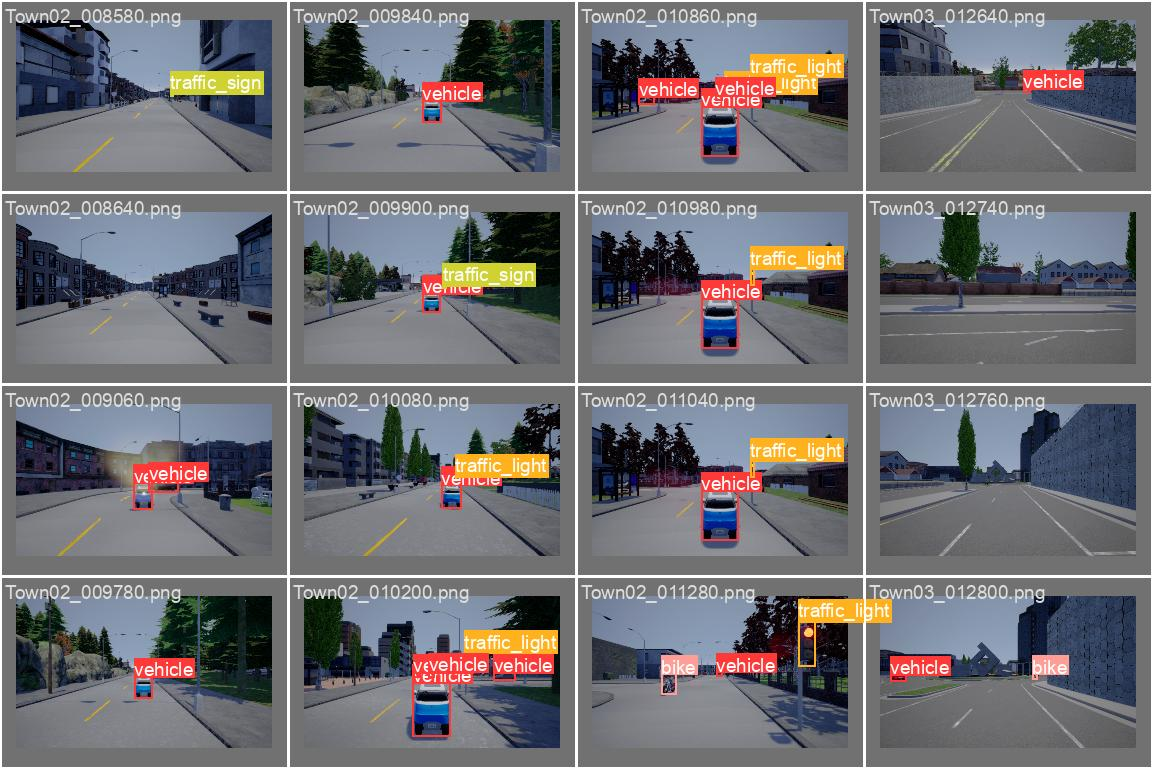

In [ ]:
Image(filename='runs/detect/train2/val_batch2_labels.jpg', width=800)

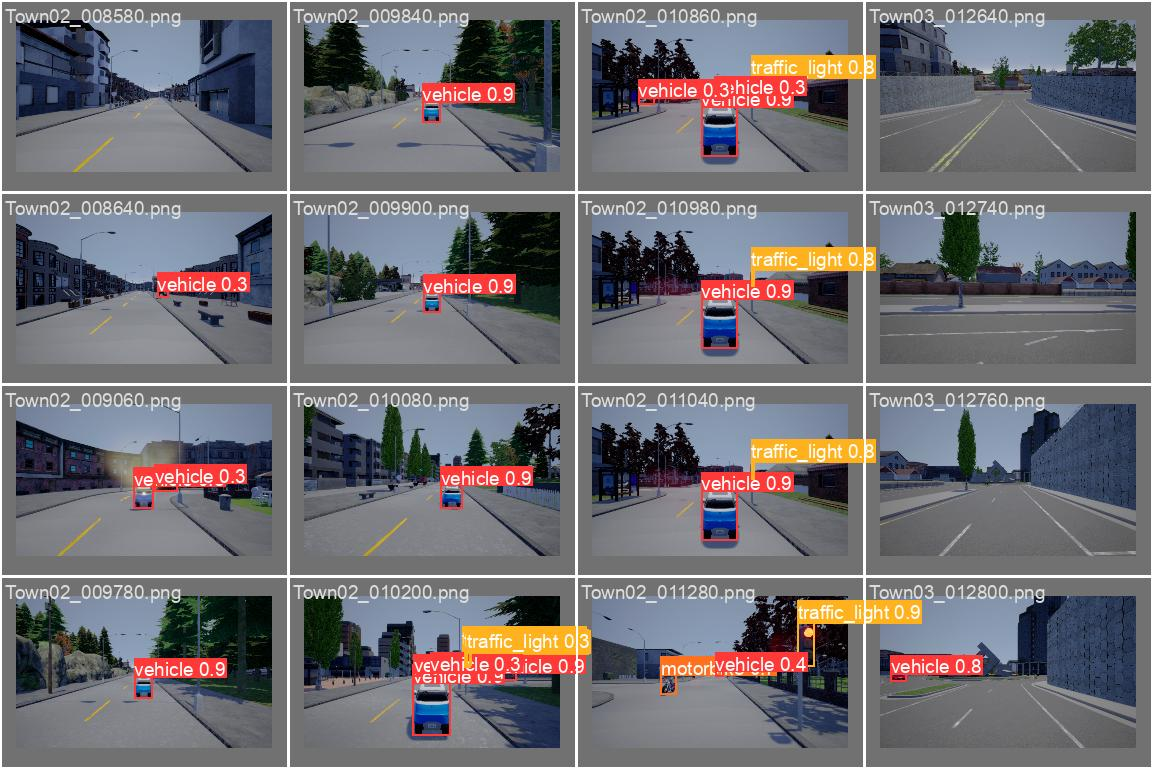

In [ ]:
Image(filename='runs/detect/train2/val_batch2_pred.jpg', width=800)

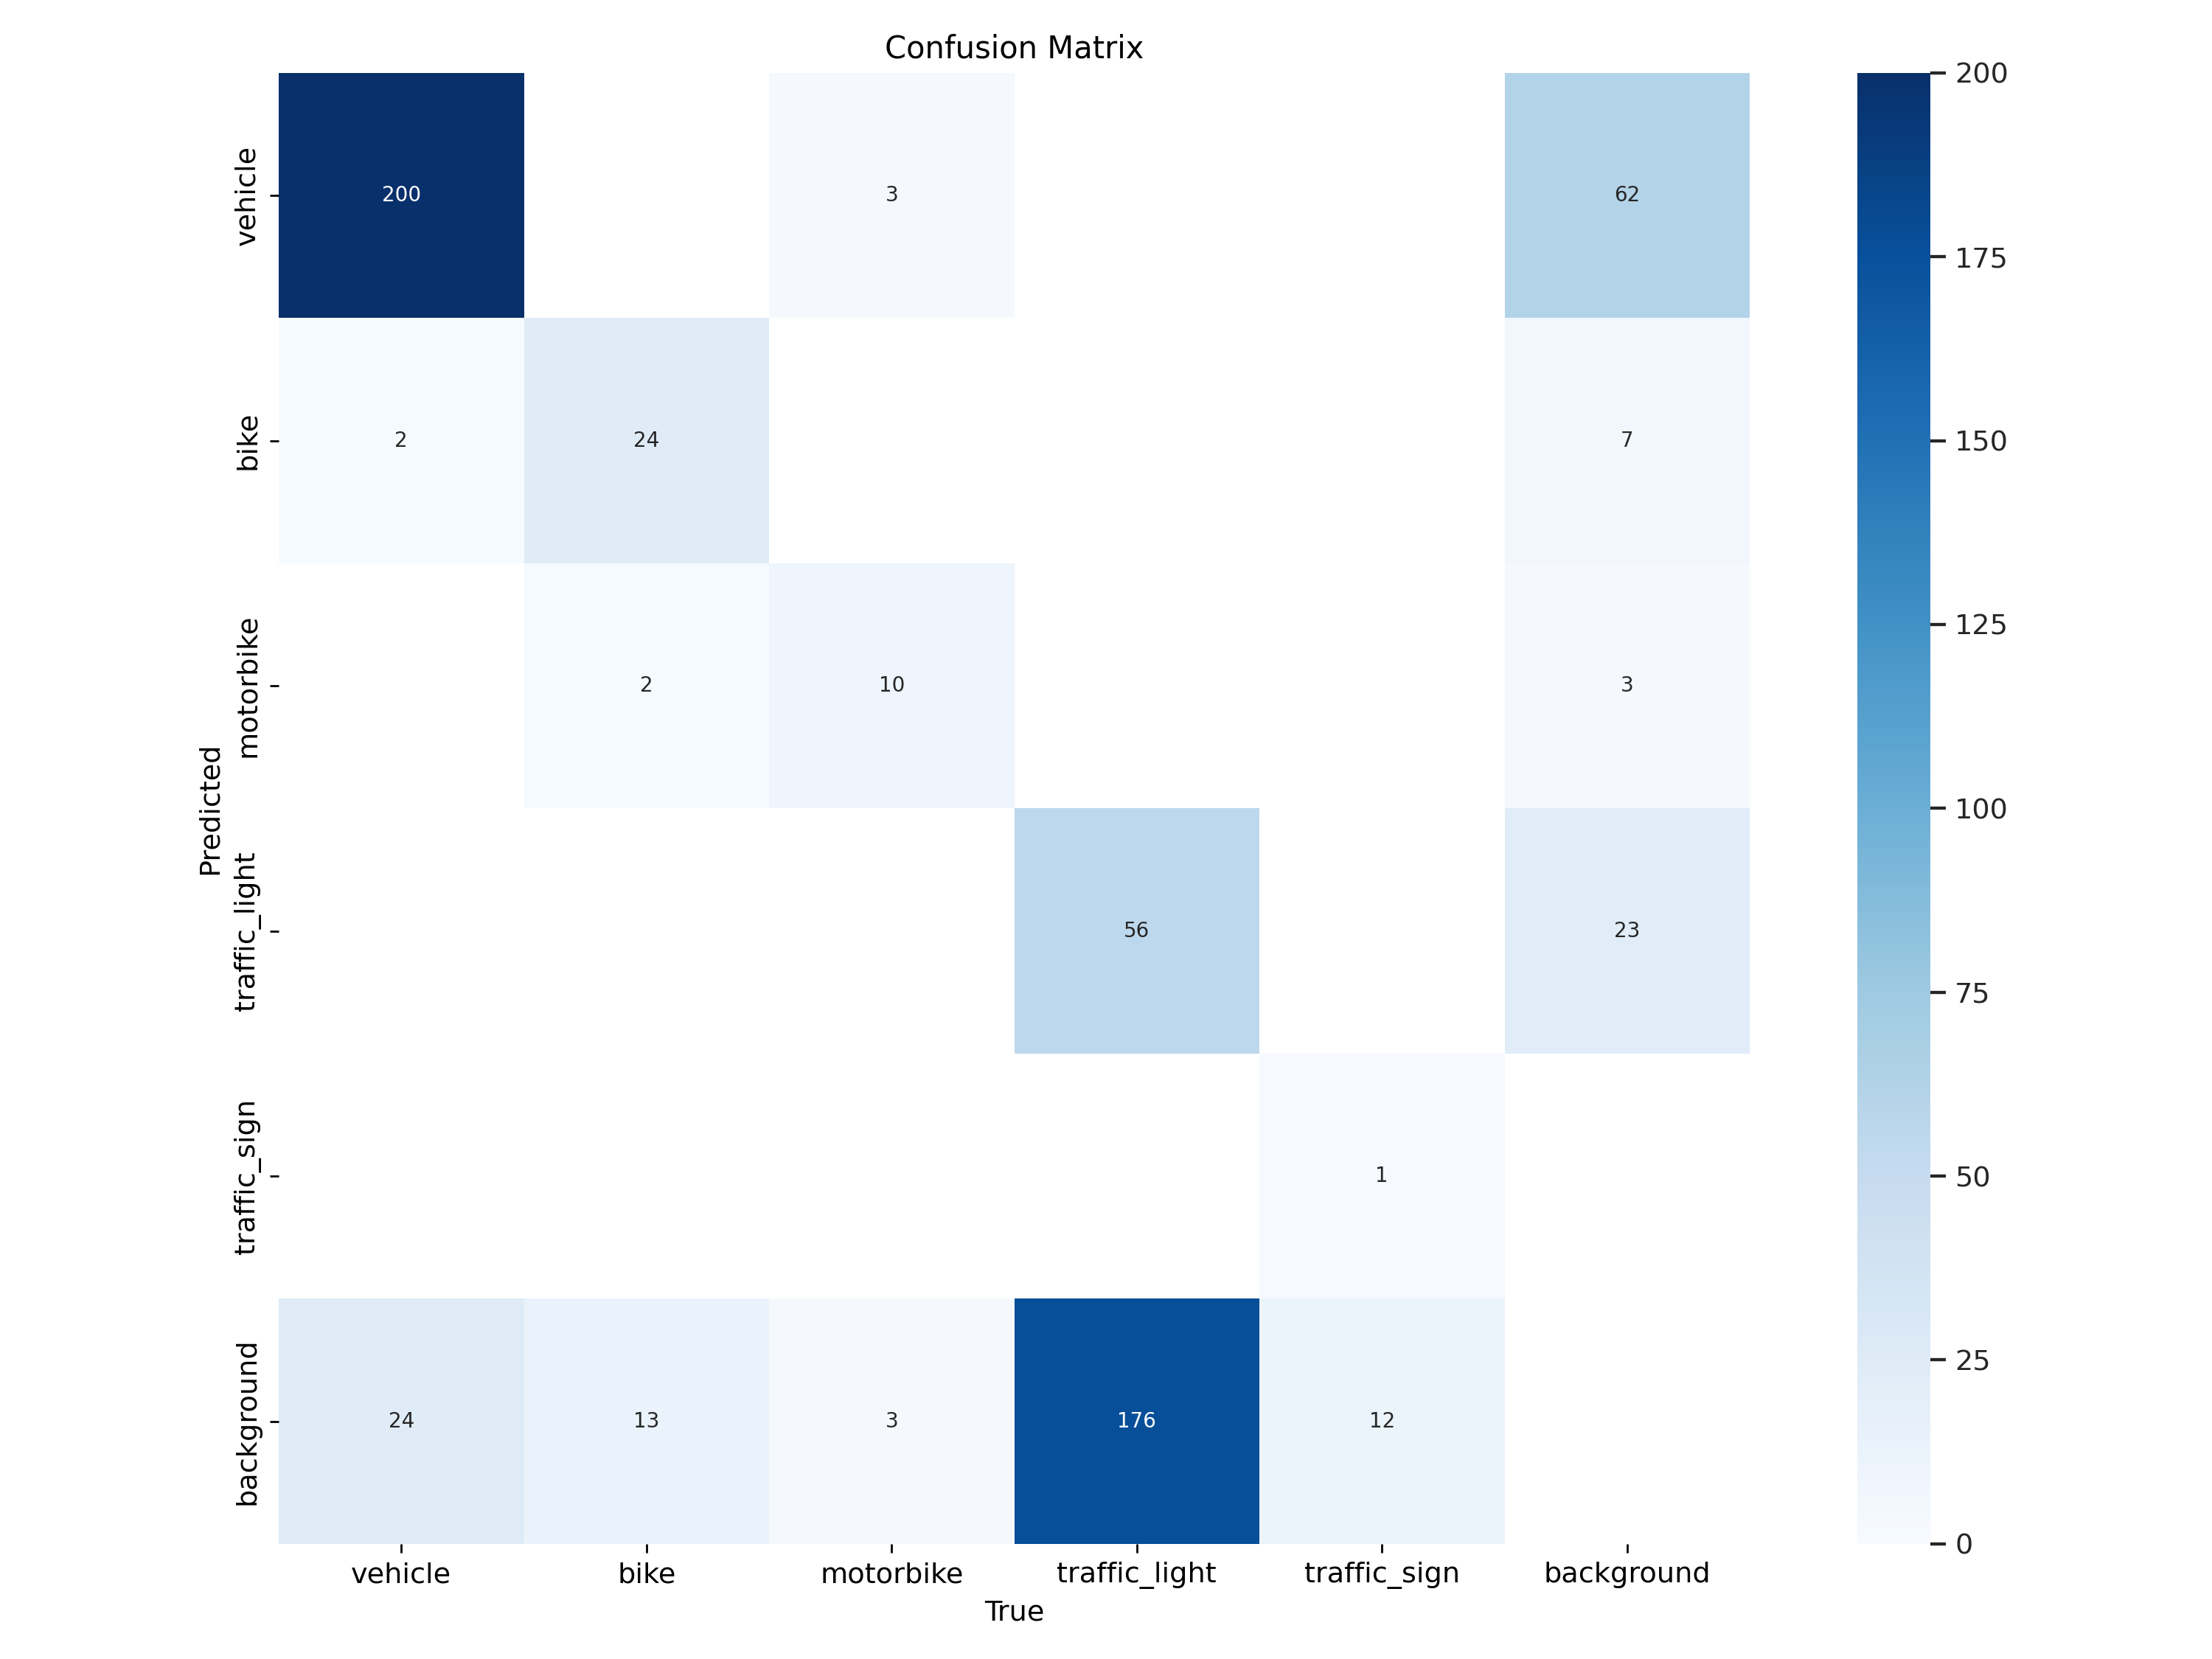

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

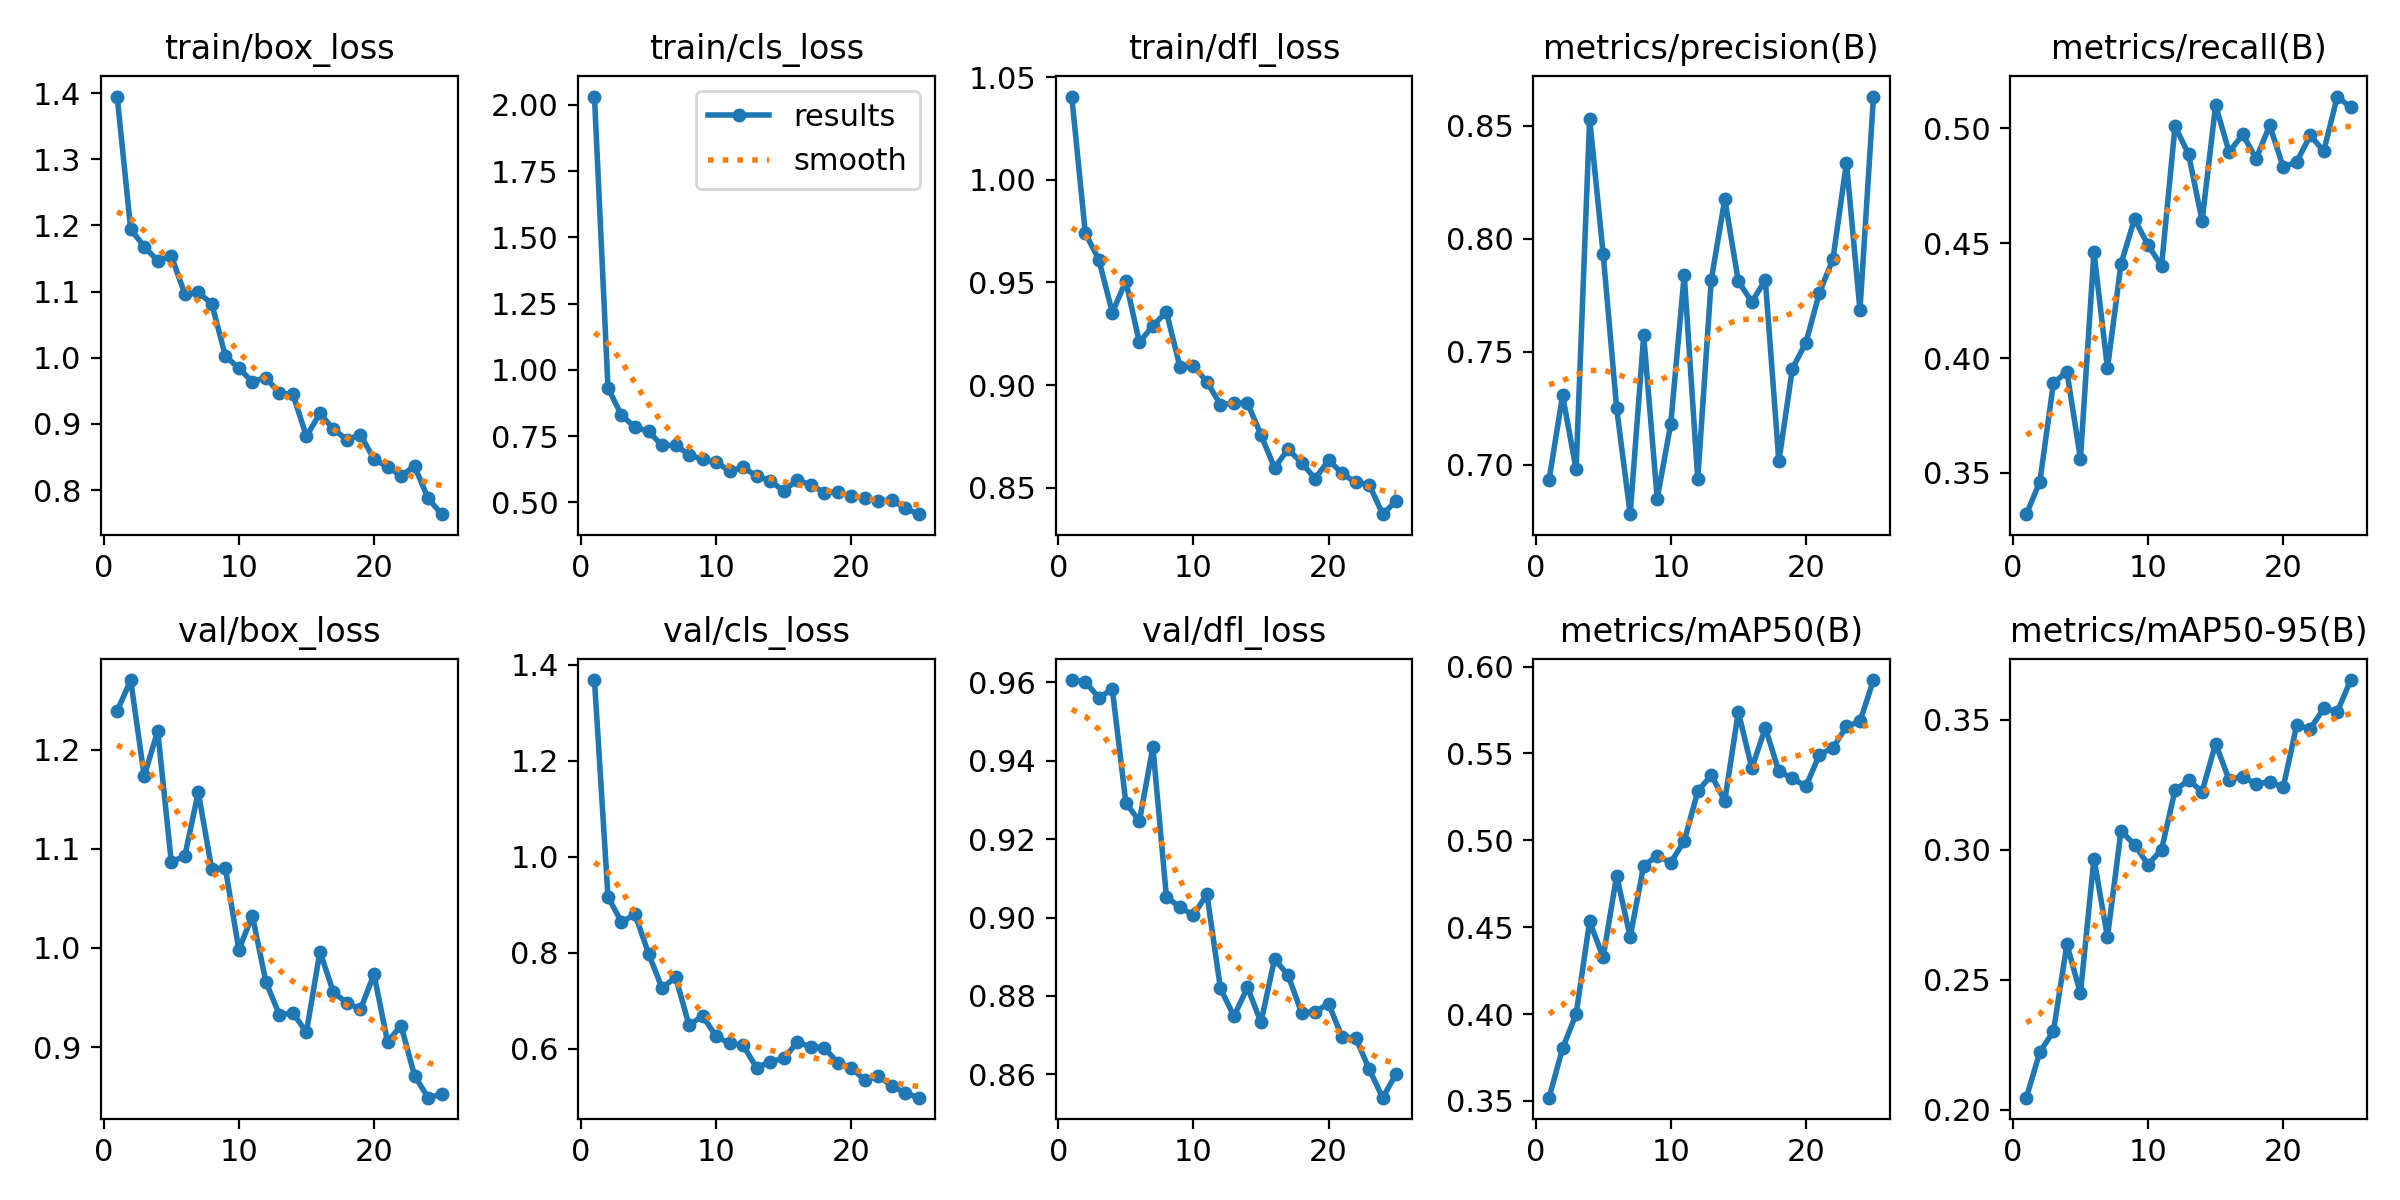

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

## Validation

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/val/labels.cache... 156 images, 25 backgrounds, 0 corrupt: 100% 156/156 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:03<00:00,  2.53it/s]
                   all        156        526      0.864      0.508      0.592      0.365
               vehicle        156        226      0.905      0.842      0.907      0.657
                  bike        156         39      0.953      0.667      0.778      0.467
             motorbike        156         16      0.857      0.748      0.826      0.474
         traffic_light        156        232      0.921      0.207      0.342      0.183
          traffic_sign        156         13      0.685     0.0769

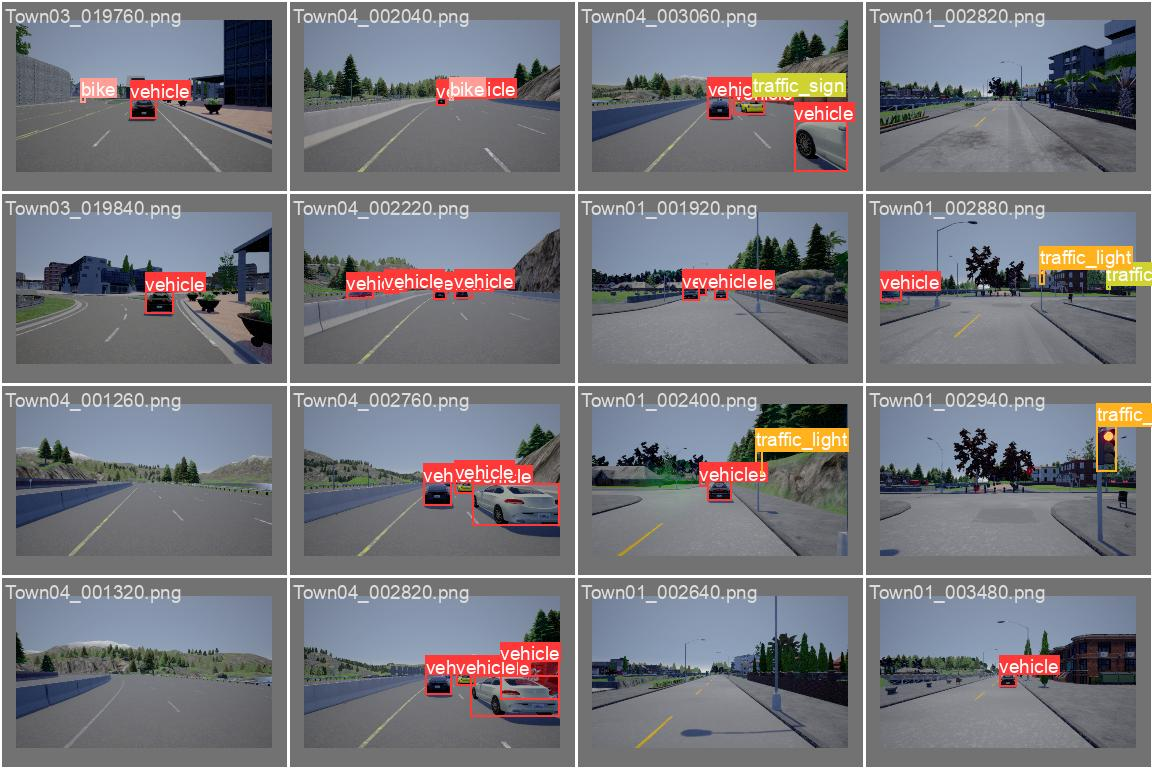

In [ ]:
Image(filename='runs/detect/val2/val_batch0_labels.jpg', width=800)

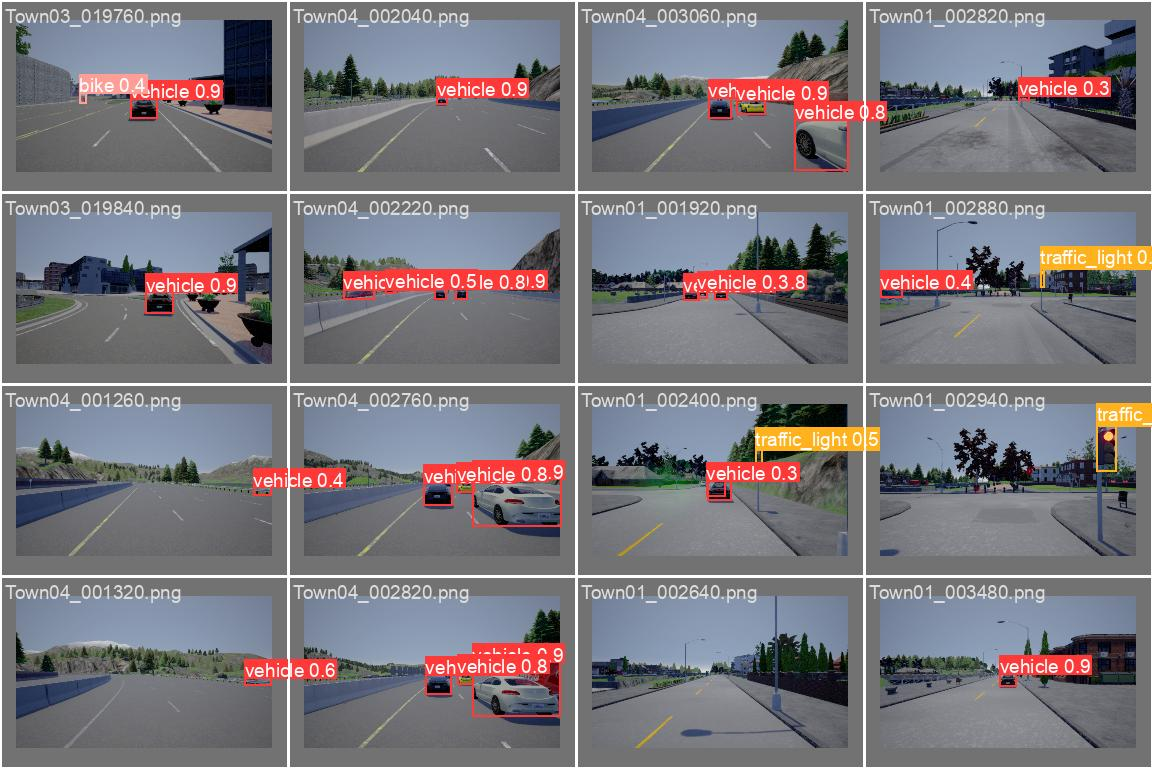

In [ ]:
Image(filename='runs/detect/val2/val_batch0_pred.jpg', width=800)

## Prediction on Test Set

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images save=True save_txt=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/199 /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/images/Town05_001920.png: 160x256 (no detections), 75.8ms
image 2/199 /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/images/Town05_001980.png: 160x256 1 vehicle, 47.3ms
image 3/199 /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/images/Town05_002040.png: 160x256 1 vehicle, 51.5ms
image 4/199 /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/images/Town05_002100.png: 160x256 1 vehicle, 2 traffic_lights, 52.6ms
image 5/199 /content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/images/Town05_002160.png: 160x256 1 vehicle, 3 traffic_lights, 40.9ms
image 6/199 /content/drive/MyDrive/Lab/Part 3/carla-obje

Predictions:



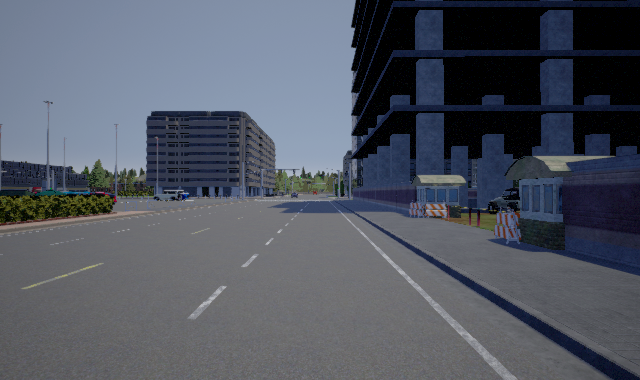

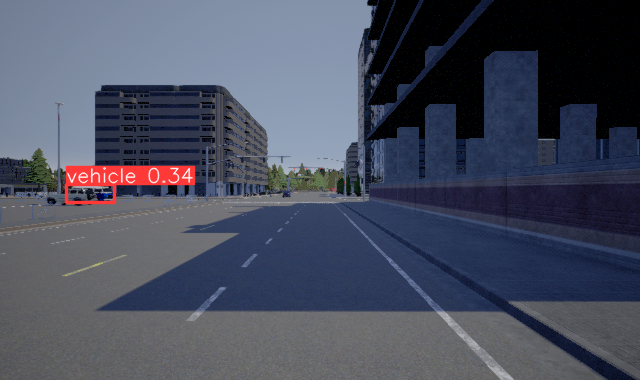

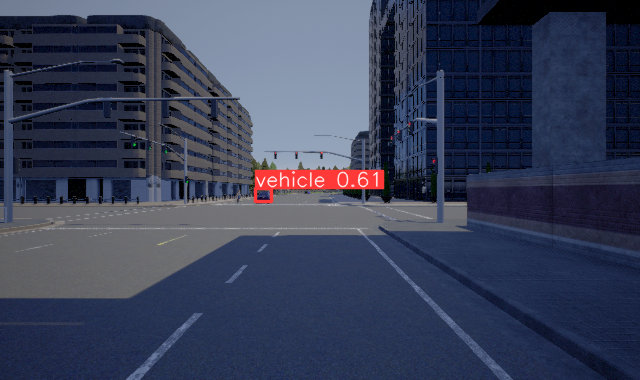

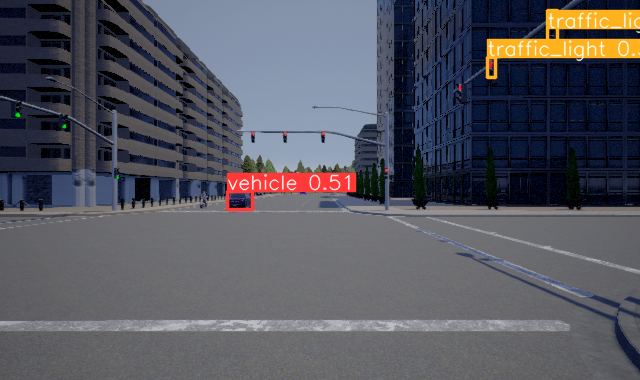

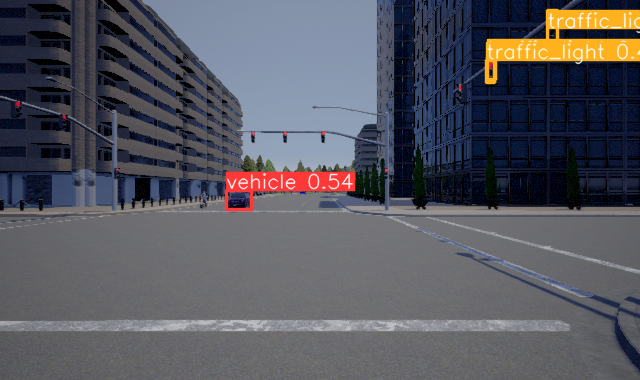

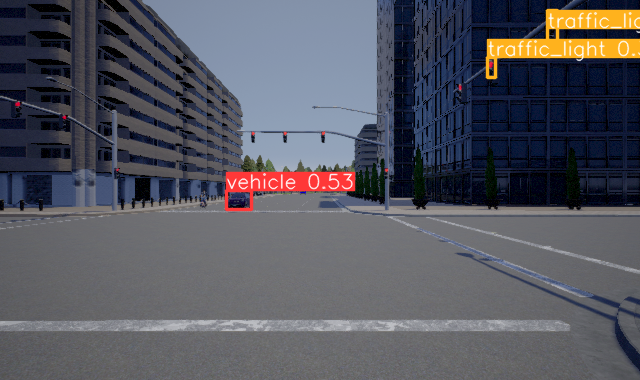

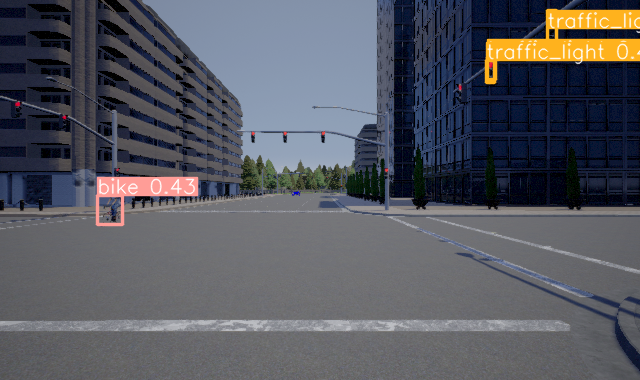

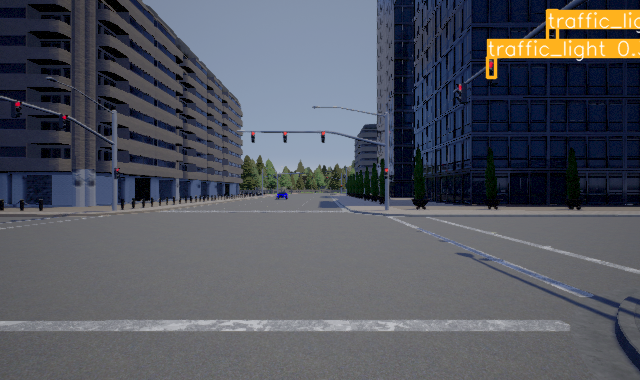

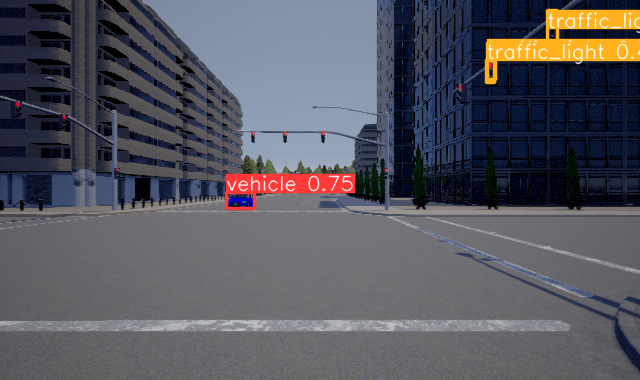

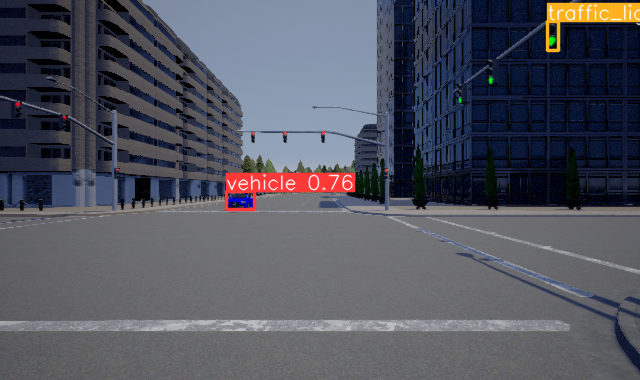

In [ ]:
import glob
from IPython.display import Image, display

print("Predictions:\n")

for image_path in glob.glob('runs/detect/predict4/*.png')[:10]:
      display(Image(filename=image_path, width=300))
      print("\n")

In [ ]:
import os
import numpy as np

def read_yolo_format(file_path):
    """
    Reads a YOLO format file (class_id, x_center, y_center, width, height)
    and returns a list of bounding boxes.
    """
    with open(file_path, 'r') as f:
        boxes = [list(map(float, line.split())) for line in f.readlines()]
    return boxes  # Each box in format [class_id, x_center, y_center, width, height]

def bbox_iou(box1, box2):
    """
    Calculate the Intersection Over Union (IOU) of two bounding boxes.
    """
    # Convert from center and width to exact coordinates
    b1_x1, b1_y1, b1_x2, b1_y2 = box1[0] - box1[2] / 2, box1[1] - box1[3] / 2, box1[0] + box1[2] / 2, box1[1] + box1[3] / 2
    b2_x1, b2_y1, b2_x2, b2_y2 = box2[0] - box2[2] / 2, box2[1] - box2[3] / 2, box2[0] + box2[2] / 2, box2[1] + box2[3] / 2

    # Calculate the intersection area
    inter_area = max(0, min(b1_x2, b2_x2) - max(b1_x1, b2_x1)) * max(0, min(b1_y2, b2_y2) - max(b1_y1, b2_y1))
    # Calculate each box area
    b1_area = (b1_x2 - b1_x1) * (b1_y2 - b1_y1)
    b2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1)
    # Calculate the union area
    union_area = b1_area + b2_area - inter_area
    # Calculate IOU
    iou = inter_area / union_area
    return iou


def calculate_overall_iou(gt_boxes, pred_boxes):
    total_iou = 0
    matched_pairs = 0

    for pred_box in pred_boxes:
        best_iou = 0
        for gt_box in gt_boxes:
            if gt_box[0] == pred_box[0]:  # Matching class IDs
                iou = bbox_iou(gt_box[1:], pred_box[1:])
                best_iou = max(best_iou, iou)
        if best_iou > 0:  # Only consider positive matches
            total_iou += best_iou
            matched_pairs += 1

    overall_iou = total_iou / matched_pairs if matched_pairs > 0 else 0
    return overall_iou, matched_pairs

# Modify the loop to calculate the overall IOU
total_iou = 0
total_matches = 0

gt_folder = '/content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/test/labels'  # Ground truth folder path
pred_folder = '/content/drive/MyDrive/Lab/Part 3/carla-object-detection-dataset/yolo_dataset/runs/detect/predict4/labels'  # Prediction folder path

# Ensure the folders end with a slash
if not gt_folder.endswith('/'):
    gt_folder += '/'
if not pred_folder.endswith('/'):
    pred_folder += '/'

# Loop through all files in the ground truth folder
for filename in os.listdir(pred_folder):
    if filename.endswith(".txt"):  # Ensure we're only processing text files
        gt_file_path = os.path.join(gt_folder, filename)
        pred_file_path = os.path.join(pred_folder, filename)

        if not os.path.exists(pred_file_path):
            print(f"No prediction file found for {filename}")
            continue

        # Read the boxes
        gt_boxes = read_yolo_format(gt_file_path)
        pred_boxes = read_yolo_format(pred_file_path)

        overall_iou, matched_pairs = calculate_overall_iou(gt_boxes, pred_boxes)
        total_iou += overall_iou * matched_pairs
        total_matches += matched_pairs

        # Example process: print out the number of boxes and calculate IOU for the first box (as an example)
        print(f"Processing {filename}:")
        print(f"  Ground Truth Boxes: {len(gt_boxes)}")
        print(f"  Prediction Boxes: {len(pred_boxes)}")

        if gt_boxes and pred_boxes:
              iou = bbox_iou(gt_boxes[0], pred_boxes[0])  # Calculate IOU for the first box pair as an example
              print(f"  IOU of the first box pair: {iou}")


        if not gt_boxes or not pred_boxes:
            print("No boxes to compare.")
            continue

        for i, gt_box in enumerate(gt_boxes):
              for j, pred_box in enumerate(pred_boxes):
                  if gt_box[0] == pred_box[0]:  # Check if classes match
                      iou = bbox_iou(gt_box[1:], pred_box[1:])  # Calculate IOU
                      print(f"  IOU of box pair GT {i} and Pred {j}: {iou:.3f}")


overall_iou = total_iou / total_matches if total_matches > 0 else 0
print(f"Overall IOU across all matches: {overall_iou:.3f}")

Processing Town05_001980.txt:
  Ground Truth Boxes: 1
  Prediction Boxes: 1
  IOU of the first box pair: 0.6650701448554072
  IOU of box pair GT 0 and Pred 0: 0.580
Processing Town05_002040.txt:
  Ground Truth Boxes: 12
  Prediction Boxes: 1
  IOU of the first box pair: 0.0
  IOU of box pair GT 11 and Pred 0: 0.709
Processing Town05_002100.txt:
  Ground Truth Boxes: 11
  Prediction Boxes: 3
  IOU of the first box pair: 0.0
  IOU of box pair GT 0 and Pred 1: 0.822
  IOU of box pair GT 1 and Pred 0: 0.000
  IOU of box pair GT 1 and Pred 2: 0.000
  IOU of box pair GT 2 and Pred 0: 0.000
  IOU of box pair GT 2 and Pred 2: 0.000
  IOU of box pair GT 3 and Pred 0: 0.000
  IOU of box pair GT 3 and Pred 2: 0.000
  IOU of box pair GT 4 and Pred 0: 0.000
  IOU of box pair GT 4 and Pred 2: 0.000
  IOU of box pair GT 5 and Pred 0: 0.000
  IOU of box pair GT 5 and Pred 2: 0.000
  IOU of box pair GT 6 and Pred 0: 0.000
  IOU of box pair GT 6 and Pred 2: 0.000
  IOU of box pair GT 7 and Pred 0: 0.000

In [ ]:
overall_iou = total_iou / total_matches if total_matches > 0 else 0
print(f"Overall IOU across all matches: {overall_iou:.3f}")

Overall IOU across all matches: 0.698
